In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = {
    'hours_of_study':[1,2,3,4,5,6,7,8],
    'pass':[0,0,0,0,1,1,1,1]
}

In [52]:
df = pd.DataFrame(data)
df

,hours_of_study,pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [53]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [54]:
def forwardprop(data, param):
    y = []
    temp =0
    X = data.to_numpy()
    b = param[-1]
    W = param[:-1]
    Y = X@ (W.T) + b
    Z = sigmoid(Y)
    return Z

In [55]:
def grad_descent(data, param, y_pred,erros, show_cost =False):
    y_act = data.iloc[:,-1].to_numpy()
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    err = -1*np.sum(((y_act*np.log(y_pred))+(1-y_act)*np.log(1-y_pred))) / len(y_act)
    erros.append(err)
    if show_cost:
        print("error: ", err)
    grads = []
    temp = (y_pred-y_act)
    for i in data.iloc[:,:-1].columns:
        X = data[i]
        dJ_dw = np.dot(temp, X)/len(y_act)
        grads.append(dJ_dw)
    dJ_db = np.sum((temp))/len(y_act)
    grads.append(dJ_db)
    return np.array(grads)

In [56]:
def backprop(data, param, grads, lr= 0.01):
    param = param- lr *grads
    return param

In [57]:
def model(df, epochs, learn =0.01, shcost =False):
    params =[]
    errors = []
    for i in df.iloc[:,:-1].columns:
        params.append(np.random.rand())
    params.append(np.random.rand())
    params = np.array(params)
    for i in range(epochs):
        Y_pred = forwardprop(df.iloc[:,:-1], params)
        grads = grad_descent(df, params, Y_pred,errors,   show_cost =shcost)
        params = backprop(df, params, grads, lr =learn)
        print(params)
    return params, errors
    

In [95]:
params, errors = model(df, 4500, learn =0.01, shcost =True)

error:  0.7813709757539571
[0.17877758 0.6707871 ]
error:  0.7775687536806537
[0.17357838 0.66772668]
error:  0.7739818036913269
[0.16856189 0.6647025 ]
error:  0.7706013186648348
[0.16372635 0.66171407]
error:  0.7674183309588043
[0.15906966 0.65876088]
error:  0.7644237746432165
[0.15458946 0.65584235]
error:  0.7616085453109394
[0.15028311 0.65295788]
error:  0.7589635566970372
[0.1461477  0.65010682]
error:  0.756479793464665
[0.14218013 0.64728848]
error:  0.7541483596482237
[0.13837705 0.64450214]
error:  0.7519605223788836
[0.13473494 0.64174707]
error:  0.7499077506486994
[0.13125014 0.6390225 ]
error:  0.7479817489932984
[0.12791881 0.63632764]
error:  0.7461744860862011
[0.12473702 0.6336617 ]
error:  0.7444782183379042
[0.12170073 0.63102387]
error:  0.7428855086783399
[0.11880584 0.62841332]
error:  0.7413892407715497
[0.11604817 0.62582923]
error:  0.7399826289663256
[0.11342352 0.62327078]
error:  0.7386592243267672
[0.11092766 0.62073715]
error:  0.737412917113181
[0.108

[ 0.22500201 -0.3128658 ]
error:  0.5572170115336808
[ 0.22530249 -0.31445387]
error:  0.5569558455827236
[ 0.22560285 -0.31604121]
error:  0.5566949196739084
[ 0.22590309 -0.31762782]
error:  0.5564342335725991
[ 0.22620322 -0.31921369]
error:  0.5561737870442746
[ 0.22650323 -0.32079882]
error:  0.5559135798545294
[ 0.22680313 -0.32238323]
error:  0.555653611769075
[ 0.2271029 -0.3239669]
error:  0.555393882553739
[ 0.22740257 -0.32554984]
error:  0.5551343919744659
[ 0.22770211 -0.32713206]
error:  0.5548751397973182
[ 0.22800155 -0.32871353]
error:  0.554616125788476
[ 0.22830086 -0.33029428]
error:  0.5543573497142377
[ 0.22860006 -0.3318743 ]
error:  0.5540988113410207
[ 0.22889914 -0.33345359]
error:  0.5538405104353613
[ 0.22919811 -0.33503215]
error:  0.5535824467639153
[ 0.22949696 -0.33660998]
error:  0.553324620093459
[ 0.22979569 -0.33818708]
error:  0.5530670301908883
[ 0.23009431 -0.33976345]
error:  0.5528096768232205
[ 0.23039282 -0.3413391 ]
error:  0.5525525597575938

[ 0.35385867 -0.98380714]
error:  0.4573505158965503
[ 0.35410926 -0.98509387]
error:  0.4571787031252471
[ 0.35435977 -0.98638006]
error:  0.4570070372196378
[ 0.35461018 -0.98766569]
error:  0.4568355180209052
[ 0.35486049 -0.98895078]
error:  0.45666414537040045
[ 0.35511071 -0.99023531]
error:  0.4564929191096426
[ 0.35536083 -0.99151929]
error:  0.4563218390803199
[ 0.35561086 -0.99280272]
error:  0.4561509051242879
[ 0.3558608  -0.99408559]
error:  0.4559801170835708
[ 0.35611063 -0.99536792]
error:  0.45580947480036055
[ 0.35636038 -0.9966497 ]
error:  0.45563897811701726
[ 0.35661003 -0.99793093]
error:  0.45546862687606854
[ 0.35685958 -0.99921161]
error:  0.45529842092021
[ 0.35710905 -1.00049175]
error:  0.45512836009230495
[ 0.35735841 -1.00177133]
error:  0.45495844423538406
[ 0.35760768 -1.00305037]
error:  0.4547886731926458
[ 0.35785686 -1.00432886]
error:  0.45461904680745574
[ 0.35810594 -1.0056068 ]
error:  0.45444956492334704
[ 0.35835493 -1.0068842 ]
error:  0.4542

[ 0.46157929 -1.5314241 ]
error:  0.3906085172453144
[ 0.46179069 -1.53248873]
error:  0.39049072736295165
[ 0.46200201 -1.53355296]
error:  0.3903730265204778
[ 0.46221326 -1.53461678]
error:  0.3902554146251012
[ 0.46242443 -1.5356802 ]
error:  0.3901378915841412
[ 0.46263553 -1.53674321]
error:  0.39002045730502777
[ 0.46284656 -1.53780582]
error:  0.38990311169530123
[ 0.46305752 -1.53886803]
error:  0.38978585466261234
[ 0.4632684  -1.53992984]
error:  0.38966868611472183
[ 0.46347921 -1.54099125]
error:  0.38955160595950095
[ 0.46368995 -1.54205225]
error:  0.3894346141049305
[ 0.46390061 -1.54311285]
error:  0.38931771045910135
[ 0.46411121 -1.54417305]
error:  0.3892008949302139
[ 0.46432173 -1.54523285]
error:  0.38908416742657836
[ 0.46453217 -1.54629225]
error:  0.38896752785661426
[ 0.46474255 -1.54735125]
error:  0.3888509761288503
[ 0.46495285 -1.54840985]
error:  0.38873451215192467
[ 0.46516308 -1.54946805]
error:  0.3886181358345844
[ 0.46537324 -1.55052585]
error:  0.

[ 0.57653331 -2.10540218]
error:  0.3332058910385324
[ 0.57670782 -2.10626652]
error:  0.33312814864528995
[ 0.57688228 -2.10713059]
error:  0.33305045552493645
[ 0.57705668 -2.10799439]
error:  0.3329728116317484
[ 0.57723103 -2.10885791]
error:  0.33289521692005536
[ 0.57740533 -2.10972116]
error:  0.33281767134423906
[ 0.57757958 -2.11058414]
error:  0.33274017485873353
[ 0.57775378 -2.11144684]
error:  0.33266272741802516
[ 0.57792793 -2.11230926]
error:  0.3325853289766525
[ 0.57810202 -2.11317142]
error:  0.3325079794892064
[ 0.57827607 -2.1140333 ]
error:  0.3324306789103295
[ 0.57845006 -2.1148949 ]
error:  0.33235342719471683
[ 0.578624   -2.11575624]
error:  0.3322762242971149
[ 0.57879789 -2.1166173 ]
error:  0.3321990701723225
[ 0.57897173 -2.11747808]
error:  0.33212196477518996
[ 0.57914552 -2.1183386 ]
error:  0.3320449080606196
[ 0.57931926 -2.11919884]
error:  0.331967899983565
[ 0.57949294 -2.12005881]
error:  0.3318909404990318
[ 0.57966658 -2.12091851]
error:  0.331

[ 0.6928845  -2.67765213]
error:  0.28677149890175335
[ 0.69302774 -2.678352  ]
error:  0.2867204714623886
[ 0.69317095 -2.6790517 ]
error:  0.2866694702581866
[ 0.69331413 -2.67975121]
error:  0.286618495268559
[ 0.69345727 -2.68045054]
error:  0.28656754647293836
[ 0.69360038 -2.68114969]
error:  0.2865166238507782
[ 0.69374345 -2.68184866]
error:  0.28646572738155257
[ 0.69388649 -2.68254745]
error:  0.28641485704475644
[ 0.69402949 -2.68324606]
error:  0.2863640128199055
[ 0.69417246 -2.68394449]
error:  0.28631319468653627
[ 0.69431539 -2.68464275]
error:  0.28626240262420555
[ 0.69445829 -2.68534082]
error:  0.2862116366124915
[ 0.69460116 -2.68603871]
error:  0.2861608966309923
[ 0.69474399 -2.68673642]
error:  0.286110182659327
[ 0.69488678 -2.68743396]
error:  0.2860594946771352
[ 0.69502954 -2.68813131]
error:  0.2860088326640772
[ 0.69517227 -2.68882849]
error:  0.2859581965998337
[ 0.69531496 -2.68952549]
error:  0.2859075864641059
[ 0.69545762 -2.69022231]
error:  0.285857

error:  0.2552359196905959
[ 0.78981858 -3.14893958]
error:  0.2551997282701853
[ 0.7899403  -3.14952863]
error:  0.25516355226928056
[ 0.790062   -3.15011755]
error:  0.2551273916775935
[ 0.79018368 -3.15070635]
error:  0.2550912464848447
[ 0.79030533 -3.15129503]
error:  0.25505511668076397
[ 0.79042695 -3.15188358]
error:  0.25501900225509
[ 0.79054855 -3.152472  ]
error:  0.2549829031975708
[ 0.79067013 -3.1530603 ]
error:  0.25494681949796283
[ 0.79079168 -3.15364847]
error:  0.25491075114603223
[ 0.79091321 -3.15423652]
error:  0.25487469813155383
[ 0.79103471 -3.15482444]
error:  0.25483866044431125
[ 0.79115619 -3.15541224]
error:  0.2548026380740973
[ 0.79127765 -3.15599991]
error:  0.25476663101071373
[ 0.79139908 -3.15658746]
error:  0.2547306392439713
[ 0.79152048 -3.15717488]
error:  0.2546946627636896
[ 0.79164186 -3.15776217]
error:  0.2546587015596973
[ 0.79176322 -3.15834934]
error:  0.2546227556218318
[ 0.79188455 -3.15893639]
error:  0.2545868249399395
[ 0.79200586 -

[ 0.84292781 -3.40533853]
error:  0.24015530034975846
[ 0.84303932 -3.40587564]
error:  0.2401252110745889
[ 0.84315081 -3.40641265]
error:  0.24009513332633195
[ 0.84326229 -3.40694955]
error:  0.24006506709799008
[ 0.84337374 -3.40748635]
error:  0.24003501238257144
[ 0.84348517 -3.40802305]
error:  0.24000496917308975
[ 0.84359658 -3.40855964]
error:  0.23997493746256454
[ 0.84370797 -3.40909613]
error:  0.23994491724402067
[ 0.84381934 -3.40963252]
error:  0.23991490851048913
[ 0.84393069 -3.41016881]
error:  0.239884911255006
[ 0.84404202 -3.41070499]
error:  0.2398549254706132
[ 0.84415333 -3.41124107]
error:  0.23982495115035837
[ 0.84426462 -3.41177705]
error:  0.2397949882872945
[ 0.84437589 -3.41231292]
error:  0.23976503687448047
[ 0.84448714 -3.41284869]
error:  0.23973509690498065
[ 0.84459837 -3.41338436]
error:  0.2397051683718648
[ 0.84470958 -3.41391993]
error:  0.23967525126820863
[ 0.84482077 -3.4144554 ]
error:  0.2396453455870931
[ 0.84493194 -3.41499076]
error:  0

In [96]:
Y_pred = forwardprop(df.iloc[:,:-1], params)
Y_pred = np.where(Y_pred>0.5, 1, 0)
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1])

In [97]:
y_act = df.iloc[:,-1].to_numpy()
error = np.sum((y_act - Y_pred)**2) / len(y_act)
accuracy = (1 - error)
print('accuracy: ', accuracy)

accuracy:  1.0


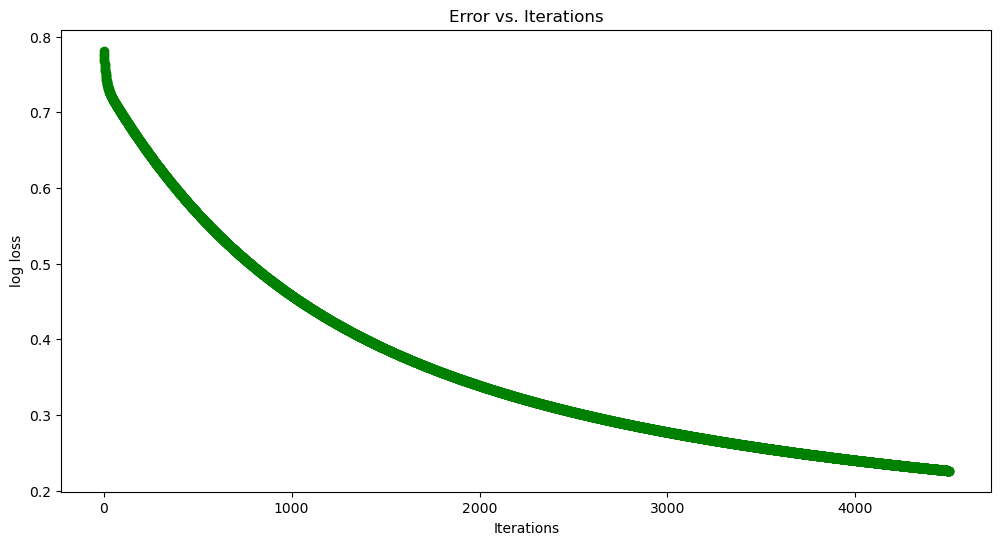

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(errors, color='green', marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('log loss')
plt.title('Error vs. Iterations')
plt.show()